In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/abdallahalidev/plantvillage-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nicoyogisyahputro
Your Kaggle Key: ··········


100%|██████████| 2.04G/2.04G [00:22<00:00, 97.8MB/s]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install split_folders
import splitfolders

In [9]:
input_folder="/content/drive/MyDrive/PraktikumML/kelompok" 
base_dir="/content/drive/MyDrive/PraktikumML/dataset_split"

In [10]:
%cd /content/drive/MyDrive/PraktikumML/kelompok
!ls -a

/content/drive/MyDrive/PraktikumML/kelompok
cercospora  commonrust	.ipynb_checkpoints  normal  northernleafblight


In [7]:

splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.7, 0.3))

Copying files: 3852 files [01:00, 64.02 files/s]


In [11]:
import os
base_dir = '/content/drive/MyDrive/PraktikumML/dataset_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_cercospora_dir = os.path.join(train_dir, 'cercospora')
train_commonrust_dir = os.path.join(train_dir, 'commonrust')
train_normal_dir = os.path.join(train_dir, 'normal')
train_northernleaf_dir = os.path.join(train_dir, 'northernleafblight')

validation_cercospora_dir = os.path.join(validation_dir, 'cercospora')
validation_commonrust_dir = os.path.join(validation_dir, 'commonrust')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_northernleaf_dir = os.path.join(validation_dir, 'northernleafblight')

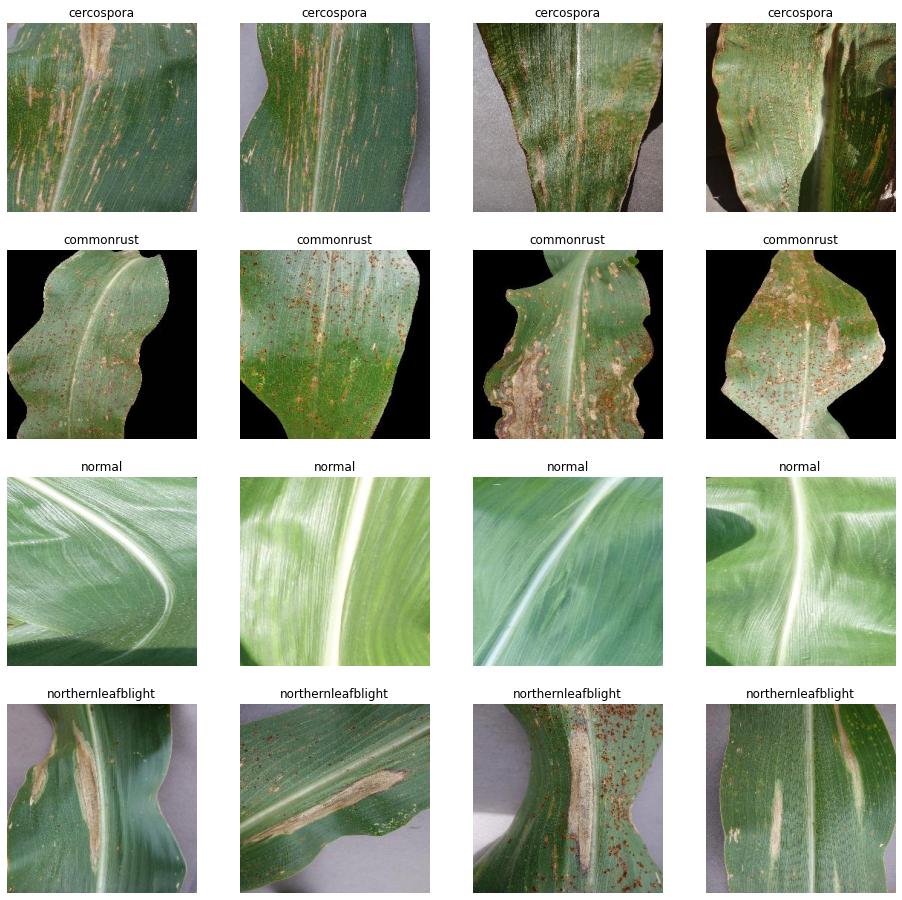

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
cercospora_img = [os.path.join(train_cercospora_dir, fname) 
                for fname in os.listdir(train_cercospora_dir)[pic_index-4:pic_index]]
commonrust_img  = [os.path.join(train_commonrust_dir, fname) 
                for fname in os.listdir(train_commonrust_dir)[pic_index-4:pic_index]]
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
northernleaf_img  = [os.path.join(train_northernleaf_dir, fname) 
                for fname in os.listdir(train_northernleaf_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(cercospora_img+commonrust_img+normal_img+northernleaf_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [13]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg"and".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [14]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg"and".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [15]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1769, 150, 150, 3)
Train Label =  (1769,)
Validation Data =  (760, 150, 150, 3)
Validation Label =  (760,)


In [16]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [130 125 126]
Data setelah di-normalisasi  [0.50980395 0.49019608 0.49411765]


In [17]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label)

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_val)

Label sebelum di-encoder  ['cercospora' 'cercospora' 'cercospora' ... 'normal' 'normal' 'normal']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten , GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image 
import cv2

In [19]:
model = Sequential()
model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

In [20]:
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [23]:
H = model.fit(x_train, y_train, batch_size=50, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
36/36 [==============================] - 33s 60ms/step - loss: 1.1191 - accuracy: 0.5512 - val_loss: 0.7874 - val_accuracy: 0.6671
Epoch 2/100
36/36 [==============================] - 1s 40ms/step - loss: 0.5199 - accuracy: 0.8095 - val_loss: 0.3601 - val_accuracy: 0.8553
Epoch 3/100
36/36 [==============================] - 1s 41ms/step - loss: 0.3877 - accuracy: 0.8406 - val_loss: 0.3383 - val_accuracy: 0.8539
Epoch 4/100
36/36 [==============================] - 1s 41ms/step - loss: 0.3686 - accuracy: 0.8491 - val_loss: 0.3228 - val_accuracy: 0.8605
Epoch 5/100
36/36 [==============================] - 1s 41ms/step - loss: 0.3638 - accuracy: 0.8496 - val_loss: 0.3183 - val_accuracy: 0.8632
Epoch 6/100
36/36 [==============================] - 1s 42ms/step - loss: 0.3495 - accuracy: 0.8508 - val_loss: 0.3100 - val_accuracy: 0.8645
Epoch 7/100
36/36 [==============================] - 1s 41ms/step - loss: 0.3573 - accuracy: 0.8485 - val_loss: 0.3068 - val_accuracy: 0.8724
Epoch

In [24]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/PraktikumML'

# simpan history model kedua
history_dict = H.history
json.dump(history_dict, open(target_dir + '/history.json', 'w'))

# simpan model kedua dan weight-nya
model.save(target_dir + '/model.h5')
model.save_weights(target_dir + '/model_weights.h5')